In [1]:
import slideio
from utils import get_driver_test_images, display_driver_test_image_info, \
                    extract_image_properties, show_scenes, show_images
import matplotlib.pyplot as plt
import json

# Test images
For the future demonstration of the library, we will be utilizing some test images. Information regarding the images and the drivers required for image processing is stored in the *image.json* file. The helper utility *get_test_images* loads this image information into a list for convenient access and utilization during the demonstration.

In [2]:
images = get_driver_test_images('VSI')
display_driver_test_image_info(images, 'VSI')

Image Path,Driver
./images/vsi-ets-test-jpg2k.vsi,VSI
./images/Image_Mouse13_PB_H7.vsi,VSI
./images/KXXM5V73XBHBK5ZVPMJT483PBR.vsi,VSI


In [3]:
extract_image_properties(images)

,Path,Scene index,Num Channels,Data Type,Compression,Width,Height,Z Slices,Z Frames
0,./images/vsi-ets-test-jpg2k.vsi,0,2,uint16,Jpeg2000,1645,1682,11,1
1,./images/Image_Mouse13_PB_H7.vsi,1,3,uint8,Jpeg,12151,12757,1,1
2,./images/Image_Mouse13_PB_H7.vsi,1,3,uint8,Jpeg,12151,12757,1,1
3,./images/KXXM5V73XBHBK5ZVPMJT483PBR.vsi,0,3,uint8,Uncompressed,608,600,1,1


Number of scenes: 4


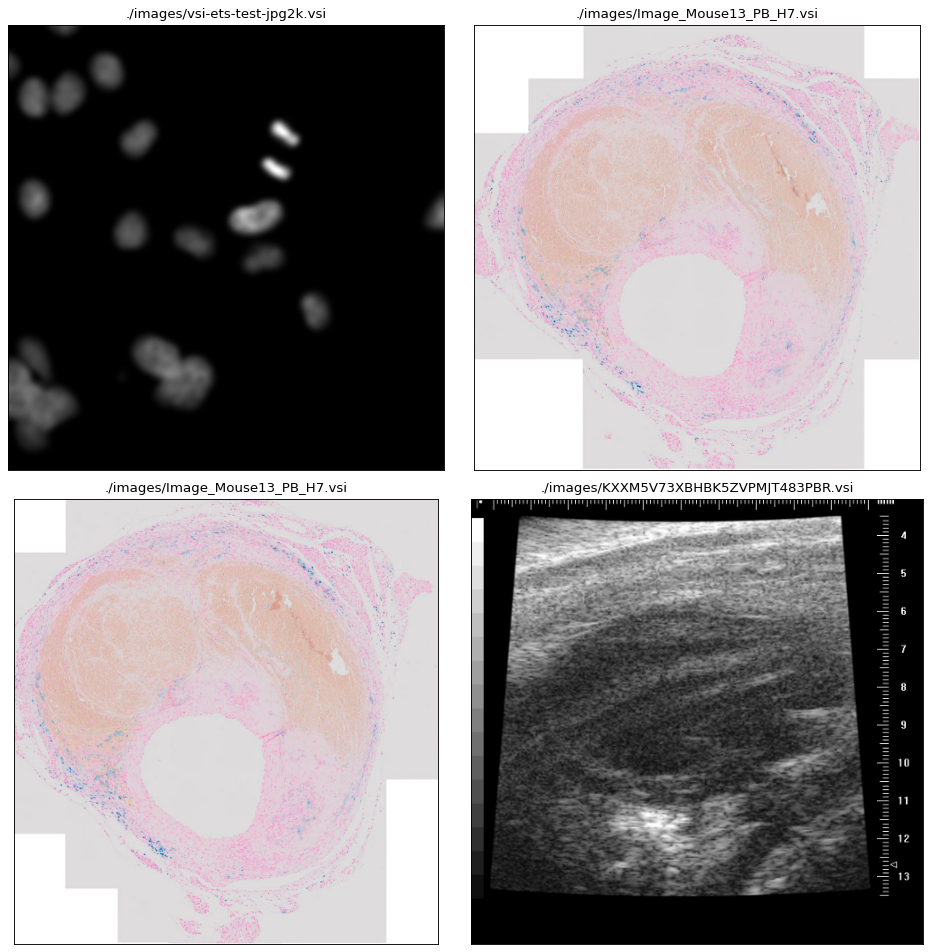

In [4]:
scenes = []
for image in images:
    slide = slideio.open_slide(image['path'],'VSI')
    num_scenes = slide.num_scenes
    for sc in range (0, num_scenes):
        scenes.append(slide.get_scene(sc))
show_scenes(scenes, 2, (500,500))

# Multidimensional images
VSI driver supports 3D images and time series. The code snipet below extracts Z slices for a 3D VSI stack.

D:\Projects\slideio\tutorial\utils.py:84: RuntimeWarning: invalid value encountered in divide
  arr_normalized = (image - image.min()) / (image.max() - image.min())
D:\Projects\slideio\tutorial\utils.py:85: RuntimeWarning: invalid value encountered in cast
  arr_8bit = (255 * arr_normalized).astype(np.uint8)


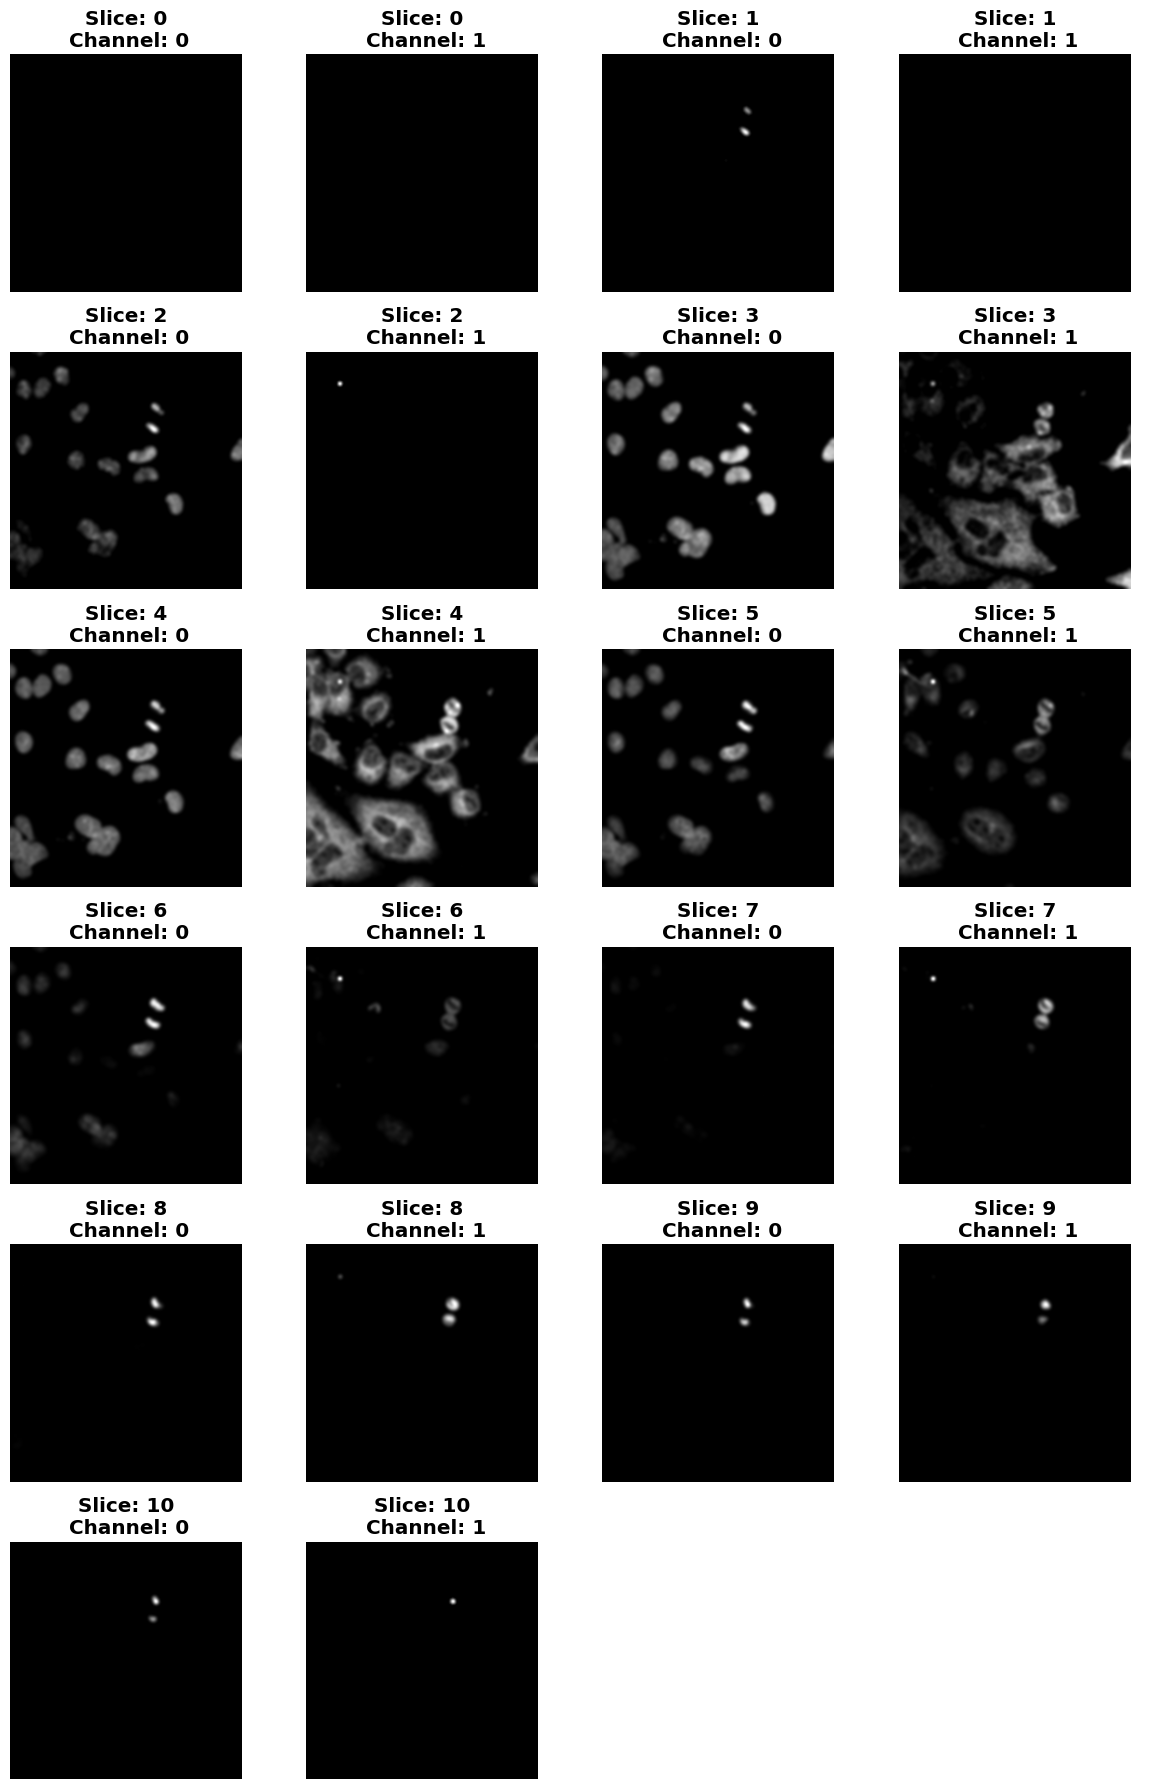

In [6]:
slide = slideio.open_slide(images[0]['path'], 'VSI')
scene = slide.get_scene(0)
num_slices = scene.num_z_slices
slices = []
titles = []
for slice_index in range (num_slices):
    for channel_index in range (scene.num_channels):
        slice = scene.read_block(channel_indices=[channel_index], slices=(slice_index, slice_index+1)) 
        title = f"Slice: {slice_index}\n Channel: {channel_index}"
        titles.append(title)
        slices.append(slice)
show_images(slices, titles, 300, 4)

# Auxiliary images
Slide and scene objects of Olympus images may contain auxiliary images like overview, maps, lables, etc.
The following snippets show extraction of auxiliary images from slide and scene objects

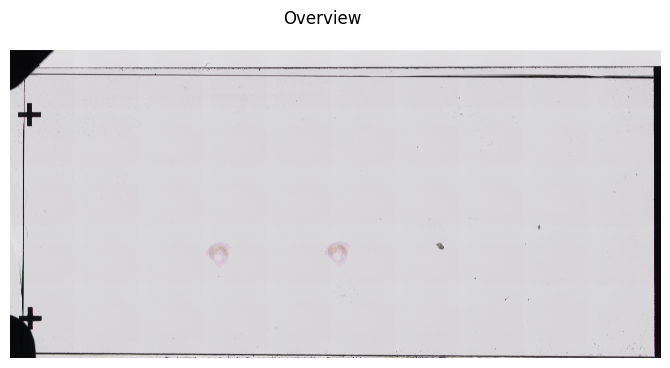

In [7]:
fig = plt.figure(figsize=(10,4))
slide = slideio.open_slide(images[1]['path'], 'VSI')
aux_image_names = slide.get_aux_image_names()
if len(aux_image_names)>0:
    aux_scene = slide.get_aux_image(aux_image_names[0])
    image = aux_scene.read_block()
    fig.suptitle(aux_image_names[0])
    plt.imshow(image)
    plt.axis("off")

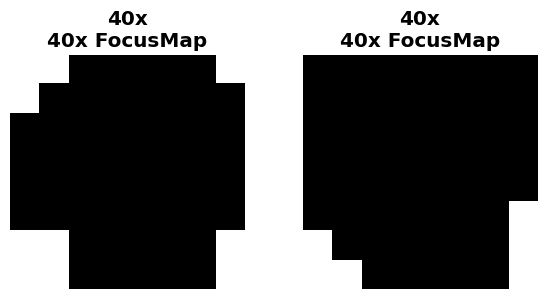

In [8]:
aux_images = []
titles = []
for scene in scenes:
    num_aux_images = scene.num_aux_images
    aux_image_names = scene.get_aux_image_names()
    scene_name = scene.name
    for aux_image_name in aux_image_names:
        aux_image = scene.get_aux_image(aux_image_name)
        aux_images.append(aux_image)
        title = scene.name + "\n" + aux_image_name
        titles.append(title)
show_images(aux_images, titles, 300, 2)

# Metadata
Slide object produced by VSI driver exposes metadata in JSON format.

In [9]:
slide = slideio.open_slide(images[1]['path'], 'VSI')
mtd = json.loads(slide.raw_metadata)
mtd

{'tag': -2,
 'name': 'root',
 'value': [{'tag': 2000,
   'name': 'Collection volume',
   'value': [{'tag': 2035,
     'name': 'Version number',
     'value': '196615',
     'secondTag': -1},
    {'tag': 2016,
     'name': 'Default sample pixel data IFD',
     'value': '',
     'secondTag': 0},
    {'tag': 2001,
     'name': 'Multidimensional image volume',
     'value': [{'tag': 2027,
       'name': 'Unknown tag',
       'value': '0',
       'secondTag': -1},
      {'tag': 2030, 'name': 'Sample flags', 'value': '0', 'secondTag': -1},
      {'tag': 2003,
       'name': 'Multidimensional Index',
       'value': ' ',
       'secondTag': -1},
      {'tag': 2031,
       'name': 'Channel dimension',
       'value': '1',
       'secondTag': -1},
      {'tag': 2034,
       'name': 'Default background color',
       'value': '255',
       'secondTag': -1},
      {'tag': 2002,
       'name': 'Image frame volume',
       'value': [{'tag': 2018,
         'name': 'External file properties',
       